# 0. Installation
可以自動動手在行外電腦裝裝看 postgres <br>
[安裝網址](https://postgresql-note.readthedocs.io/en/latest/section01/Install/01_install-PostgreSQL.html) <br>
[新手教學](https://docs.postgresql.tw/tutorial)

# 1. Introduction of Database

市面上有許多關聯式資料庫(Related database)，常見的有：
* Sqlite
* MySQL
* PostgreSQL
* Oracle Database
* DB2

## Postgres 簡介

PostgreSQL 是美國加州伯克萊大學資訊科學系基於 [POSTGRES 4.2](https://dsf.berkeley.edu/postgres.html) 所研發的物件關聯式資料庫管理系統（ORDBMS, Object-Relational Database Management System）。POSTGRES 中的許多重要概念成為日後一些商用資料庫系統重要的一部份。

PostgreSQL 由伯克萊大學公開其原始碼所誕生，它支援了大多數的標準 SQL 語法，並提供許多先進的功能：

* 複雜查詢（complex queries）
* 外部索引鍵（foreign keys）
* 觸發器（triggers）
* 可更新檢查表（updatable views）
* 事務完整性（transactional integrity）
* 多版本併行控制（multiversion concurrency control）

同時，PostgreSQL 也支援讓使用者能以自己的方式進行擴充。比如透過新增：

* 資料型別（data types）
* 函數（functions）
* 操作（operators）
* 聚合函數（aggregate functions）
* 索引方法（index methods）
* 過程式語言（procedural languages）

並且基於自由許可證，任何人都能夠以任何目的，免費地使用、修改、與散布 PostgreSQL，不論是個人使用、商業用途還是學術研究。<br>
[參考來源](https://github.com/pgsql-tw/gitbook-docs)

## DDL（Data Definition Language)
* CREATE 建立資料庫/資料表
* DROP 刪除資料庫/資料表
* ALTER 修改資料表結構

## DML（Data Manipulation Language）
* INSERT 插入資料
* SELECT 查詢資料
* UPDATE 更新資料
* DELETE 刪除資料

## DCL（Data Control Language）
* COMMIT 將操作更新到資料庫
* ROLLBACK 取消對資料庫的操作
* GRANT 授權使用者
* REVOKE 取消使用者權限

## 權限
[參考來源](https://docs.postgresql.tw/the-sql-language/ddl/privileges) <br>
當一個資料庫物件被建立時，它會先指定存取權限給擁有者，而擁有者一般來說就是執行建立指令的使用者。對大多數的資料庫物件來說，其預設的狀態就是只有擁有者（或超級使用者）可以對該物件進行所有操作。要讓給其他使用者來操作的話，就必須進行授權的動作。
有很多不同種類的權限：SELECT、INSERT、UPDATE、DELETE、TRUNCATE、REFERENCES、TRIGGER、CREATE、CONNECT、TEMPORARY、EXECUTE、USAGE。這些權限對於不同物件的效果，會因為是哪一種物件而有所差別（表格、函式...等等）。要瞭解完整在 PostgreSQL 中所支援的各種物件權限，請參考 GRANT 語法頁面。這裡的內容主要說明如何使用。
修改和移除一個資料庫物件，是只有擁有者才具備的權力。
要把一個物件被指派給一個新的擁有者的話，使用該物件的 ALTER 指令，例如：ALTER TABLE。超級使用者也可以做指派的動作；原來的擁有者如果它仍是該物件的管理群組一員的話，當然也可以；再來就管理群組新的成員。
要進行授權行為的話，請使用 GRANT 指令。舉例來說，如果 joe 是一個使用者，而 accounts 是一個表格，要讓他可以獲得更新表格資料的權力：
```
GRANT UPDATE ON accounts TO joe;
```

## SQL 數據類型


# 3. Postgres 操作指令

指令需在 terminal 操作

1. 切換資料庫
```
psql -U 帳號 -h hostname -d database
```

2. 查看所有表格
```
\dt
```

3. 獲得某表的詳細內容
```
\d 表名
```

4. CREATE TABLE <br>
```
CREATE TABLE IF NOT EXISTS schema_name.table_name(
    column_name data_type [ DEFAULT default_expr ] [ column_constraint [ ... ] ]
);
```
- 範例
``` sql=
CREATE TABLE IF NOT EXISTS demo_project.train(
    customer_id character varing(100) PRIMARY KEY,
    sex character varing(1) NOT NULL,
    height numeric(3,2) NOT NULL,
    weight numeric(3,2) NOT NULL
);

5. DELETE <br>
```
DELETE FROM [ ONLY ] table [ WHERE condition ]
```

6. DROP TABLE <br>
```
DROP TABLE name [, ...] [ CASCADE | RESTRICT ]
```

7. GRANT <br>
```
GRANT { USAGE | ALL [ PRIVILEGES ] }
ON LANGUAGE lang_name [, ...]
TO { username | GROUP group_name | PUBLIC } [, ...] [ WITH GRANT OPTION ]
```

8. INSERT <br>
```
INSERT INTO table [ ( column [, ...] ) ]
{ DEFAULT VALUES | VALUES ( { expression | DEFAULT } [, ...] ) | query }
```

9. SELECT <br>
```
SELECT [ ALL | DISTINCT [ ON ( expression [, ...] ) ] ]
all expression(*) [ AS output_name ] [, ...]
[ FROM from_item [, ...] ]
[ WHERE condition ]
[ GROUP BY expression [, ...] ]
[ HAVING condition [, ...] ]
[ { UNION | INTERSECT | EXCEPT } [ ALL ] select ]
[ ORDER BY expression [ ASC | DESC | USING operator ] [, ...] ]
[ LIMIT { count | ALL } ]
[ OFFSET start ]
[ FOR UPDATE [ OF table_name [, ...] ] ]
```

10. TRUNCATE <br>
清空一個表
```
TRUNCATE [ TABLE ] name
```

# 4. python 操作 Postgres(psycopg2)

## 步驟 1：連線

In [4]:
import psycopg2

# Update connection string information
host = "localhost"
dbname = "erik"
user = "erik"
password = "1110"
sslmode = "allow"

# Construct connection string
conn_string = "host={0} user={1} dbname={2} password={3} sslmode={4}".format(host, user, dbname, password, sslmode)
conn = psycopg2.connect(conn_string)
print("Connection established")


Connection established


## 步驟 2：CREATE SCHEMA

In [5]:
cursor = conn.cursor()

# Drop previous table of same name if one exists
cursor.execute("DROP TABLE IF EXISTS inventory;")
print("Finished dropping table (if existed)")

# Create a table
cursor.execute("CREATE TABLE inventory (id serial PRIMARY KEY, name VARCHAR(50), quantity INTEGER);")
print("Finished creating table")

# Insert some data into the table
cursor.execute("INSERT INTO inventory (name, quantity) VALUES (%s, %s);", ("banana", 150))
cursor.execute("INSERT INTO inventory (name, quantity) VALUES (%s, %s);", ("orange", 154))
cursor.execute("INSERT INTO inventory (name, quantity) VALUES (%s, %s);", ("apple", 100))
print("Inserted 3 rows of data")

# Clean up
conn.commit()
cursor.close()
conn.close()

Finished dropping table (if existed)
Finished creating table
Inserted 3 rows of data


查看資料庫

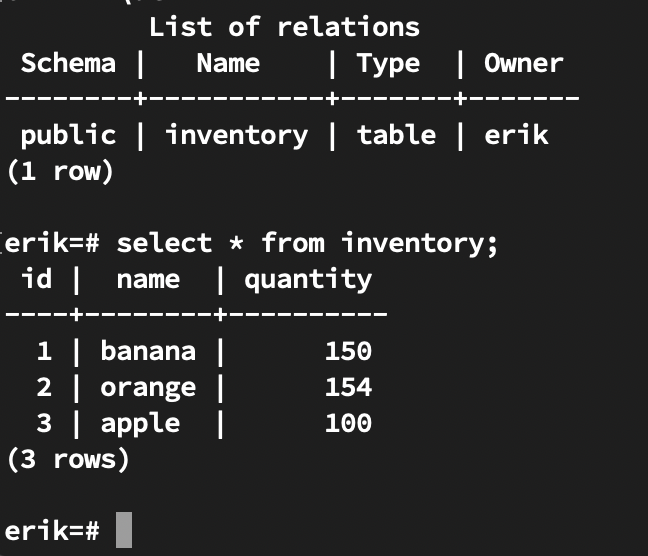

## 步驟 3: Select data

In [9]:
# Construct connection string
conn_string = "host={0} user={1} dbname={2} password={3} sslmode={4}".format(host, user, dbname, password, sslmode)
conn = psycopg2.connect(conn_string)
print("Connection established")

cursor = conn.cursor()
# Fetch all rows from table
cursor.execute("SELECT * FROM inventory;")
rows = cursor.fetchall()

# Print all rows
for row in rows:
    print("Data row = (%s, %s, %s)" %(str(row[0]), str(row[1]), str(row[2])))

cursor.close()
conn.close()

Connection established
Data row = (1, banana, 150)
Data row = (2, orange, 154)
Data row = (3, apple, 100)


### 講師提醒 
養成連線用完一定要關閉，避免佔用資源 <br>
但是一直重啟連線關閉連線也是很麻煩的事情 <br>
不如自己用 with 來完成這件事

In [18]:
# Construct connection string
conn_string = "host={0} user={1} dbname={2} password={3}".format(host, user, dbname, password, sslmode)
with psycopg2.connect(conn_string) as conn:
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM inventory;")
    rows = cursor.fetchall()
    # Print all rows
    for row in rows:
        print("Data row = (%s, %s, %s)" %(str(row[0]), str(row[1]), str(row[2])))

Data row = (1, banana, 150)
Data row = (2, orange, 154)
Data row = (3, apple, 100)


In [13]:
conn

<connection object at 0x10347ce10; dsn: 'user=erik password=xxx dbname=erik host=localhost', closed: 0>

### python 小教室：為什麼 with 可以做這件事？
with 在一開始會呼叫 \__enter__ ，在結束的時候呼叫 \__exit__ 釋放資源，因此可以利用這個特性來讀取資料的類似操作

In [ ]:
class ManagedFile:
    def __init__(self, name):
        self.name = name
    
    def __enter(self):
        self.file = open(self.name, 'w')
        return self.file
    
    def __exit__(self, exc_type, exc_value, exc_tb):
        if self.file:
            self.file.close()

with ManagedFile('hello.txt') as f:
    f.write("Hello, world!")

## 步驟 4: Update data

In [6]:
with psycopg2.connect(conn_string) as conn:
    cursor = conn.cursor()
    # Update a data row in the table
    cursor.execute("UPDATE inventory SET quantity = %s WHERE name = %s;", (200, "banana"))
    print("Updated 1 row of data")

Updated 1 row of data


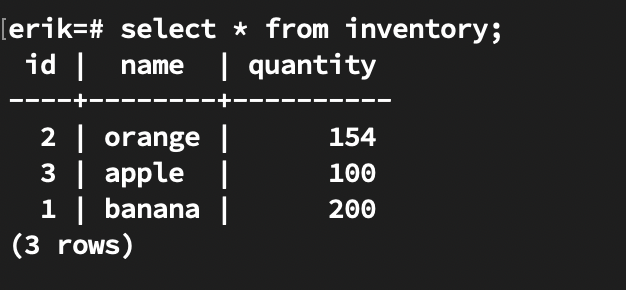

## 步驟 5: Delete data

In [7]:
with psycopg2.connect(conn_string) as conn:
    cursor = conn.cursor()
    # Delete data row from table
    cursor.execute("DELETE FROM inventory WHERE name = %s;", ("orange",))
    print("Deleted 1 row of data")

Deleted 1 row of data


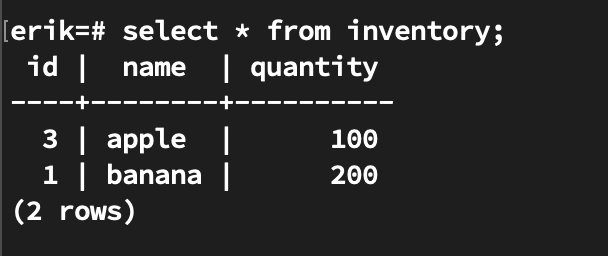